<a href="https://colab.research.google.com/github/meiruv/Resumes_Dataset/blob/main/Field_Classification_With_Community_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import

In [124]:
import json

KAGGLE_PROJECT_NAME = 'gauravduttakiit/resume-dataset'

TO_KAGGLE_JSON = {'username': 'meiravu', 'key': 'a3bfa698c6ebd7f58afcb901af24870a'}

with open('kaggle.json', 'w') as json_file:
  json.dump(TO_KAGGLE_JSON, json_file)

! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! cp kaggle.json ~/.kaggle/
! kaggle datasets download -d $KAGGLE_PROJECT_NAME



mkdir: cannot create directory ‘/root/.kaggle’: File exists
resume-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [125]:
import os
import zipfile

local_zip = 'resume-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('resume-dataset')
zip_ref.close()

# Loading the Data

In [126]:
import pandas as pd

resume_df = pd.read_csv('resume-dataset/UpdatedResumeDataSet.csv')
resume_df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [127]:
resume_df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Operations Manager           40
Mechanical Engineer          40
Blockchain                   40
Data Science                 40
ETL Developer                40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Engineering       30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

# PreProcessing

In [128]:
# Cleaning the texts
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords, strip_multiple_whitespaces, strip_non_alphanum, strip_short, strip_numeric, stem_text

resume_df['clean_resume'] = resume_df.apply(lambda row: strip_multiple_whitespaces(strip_non_alphanum(remove_stopwords(strip_numeric(row['Resume'].lower().encode('ascii',errors='ignore'))))), axis = 1)


In [129]:
resume_df['clean_resume']

0      skills programming languages python pandas num...
1      education details b e uit rgpv data scientist ...
2      areas deep learning control design programming...
3      skills r python sap hana tableau sap hana sql ...
4      education details mca ymcaust faridabad haryan...
                             ...                        
957    skills proficient ms office word basic excel p...
958    willingness accept challenges positive thinkin...
959    personal skills quick learner eagerness learn ...
960    skills software knowledge ms power point ms of...
961    skill set os windows xp database mysql sql ser...
Name: clean_resume, Length: 962, dtype: object

In [130]:
from gensim.parsing.preprocessing import preprocess_string

# I removed any charachter that isn't in english via encoding to ascii, stripped numbers and punctuation because I only care for
# words here and dropped stop words as they don't contribute to my purpose and only generate noise.
# I considered removing non english words and stemming but this led to ruining words like names of packages (
# for example - stemming turned pandas into panda) so I decided to not do this at the moment and perhaps later figure
# out how to unite words like design and designed without harming names and domain phrases

CUSTOM_FILTERS = [lambda x: x.lower().encode('ascii',errors='ignore'), strip_multiple_whitespaces, strip_non_alphanum, remove_stopwords,strip_numeric]

resume_df['clean_resume_tokens'] = resume_df.apply(lambda row: preprocess_string(row['Resume'], CUSTOM_FILTERS), axis = 1)



In [131]:
resume_df.loc[0,'clean_resume_tokens']

['skills',
 'programming',
 'languages',
 'python',
 'pandas',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib',
 'sql',
 'java',
 'javascript',
 'jquery',
 'machine',
 'learning',
 'regression',
 'svm',
 'nave',
 'bayes',
 'knn',
 'random',
 'forest',
 'decision',
 'trees',
 'boosting',
 'techniques',
 'cluster',
 'analysis',
 'word',
 'embedding',
 'sentiment',
 'analysis',
 'natural',
 'language',
 'processing',
 'dimensionality',
 'reduction',
 'topic',
 'modelling',
 'lda',
 'nmf',
 'pca',
 'neural',
 'nets',
 'database',
 'visualizations',
 'mysql',
 'sqlserver',
 'cassandra',
 'hbase',
 'elasticsearch',
 'd',
 'js',
 'dc',
 'js',
 'plotly',
 'kibana',
 'matplotlib',
 'ggplot',
 'tableau',
 'regular',
 'expression',
 'html',
 'css',
 'angular',
 'logstash',
 'kafka',
 'python',
 'flask',
 'git',
 'docker',
 'vision',
 'open',
 'cv',
 'understanding',
 'deep',
 'learning',
 'education',
 'details',
 'data',
 'science',
 'assurance',
 'associate',
 'data',
 'science',
 'assur

# Counting Appearance of a Word in Each Resume Via Bag Of Words

In [132]:
from gensim import corpora

dictionary = corpora.Dictionary(resume_df['clean_resume_tokens'])
print(dictionary)

Dictionary(7082 unique tokens: ['accelerating', 'accounting', 'action', 'addresses', 'advanced']...)


In [133]:
from gensim.parsing.preprocessing import stem_text

stem_text('designed designing')

'design design'

In [134]:
dictionary.token2id

{'accelerating': 0,
 'accounting': 1,
 'action': 2,
 'addresses': 3,
 'advanced': 4,
 'analysis': 5,
 'analytic': 6,
 'analytics': 7,
 'analyzing': 8,
 'angular': 9,
 'anomalies': 10,
 'answer': 11,
 'asks': 12,
 'assisted': 13,
 'assisting': 14,
 'assists': 15,
 'associate': 16,
 'assurance': 17,
 'attacks': 18,
 'automated': 19,
 'automating': 20,
 'based': 21,
 'bayes': 22,
 'best': 23,
 'blob': 24,
 'boosting': 25,
 'bootstrap': 26,
 'bot': 27,
 'build': 28,
 'case': 29,
 'cases': 30,
 'cassandra': 31,
 'categories': 32,
 'category': 33,
 'chain': 34,
 'chat': 35,
 'chatbot': 36,
 'classification': 37,
 'classifier': 38,
 'clients': 39,
 'cloud': 40,
 'cluster': 41,
 'coding': 42,
 'comments': 43,
 'company': 44,
 'content': 45,
 'core': 46,
 'cosine': 47,
 'costs': 48,
 'counter': 49,
 'created': 50,
 'css': 51,
 'customer': 52,
 'customized': 53,
 'cv': 54,
 'cyber': 55,
 'd': 56,
 'dashboard': 57,
 'dashboards': 58,
 'data': 59,
 'database': 60,
 'dc': 61,
 'decision': 62,
 'dec

In [135]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase = False, min_df = 15, max_df = 900)
X = vectorizer.fit_transform(resume_df['clean_resume'])


In [136]:
vectorizer.get_feature_names()

['ab',
 'abilities',
 'ability',
 'able',
 'academic',
 'academy',
 'acb',
 'accenture',
 'accept',
 'acceptance',
 'accepted',
 'access',
 'accordance',
 'according',
 'account',
 'accounting',
 'accounts',
 'accuracy',
 'accurate',
 'accurately',
 'ace',
 'achieve',
 'achieved',
 'achievements',
 'achieving',
 'acquired',
 'acquiring',
 'act',
 'action',
 'actions',
 'active',
 'actively',
 'activities',
 'activity',
 'actual',
 'actuator',
 'actuators',
 'ad',
 'add',
 'added',
 'adding',
 'additional',
 'additionally',
 'address',
 'addressed',
 'adherence',
 'admin',
 'administration',
 'administrative',
 'administrator',
 'advance',
 'advanced',
 'advantage',
 'advertising',
 'advocate',
 'aes',
 'agent',
 'agents',
 'agile',
 'agreement',
 'aim',
 'air',
 'airtel',
 'aissms',
 'aix',
 'ajax',
 'alarm',
 'alert',
 'alerts',
 'algorithm',
 'algorithms',
 'allow',
 'also',
 'alternate',
 'american',
 'amravati',
 'analyse',
 'analyses',
 'analysis',
 'analyst',
 'analysts',
 'analy

In [137]:
bow_df = pd.DataFrame(X.toarray())
bow_df.columns = vectorizer.get_feature_names()
bow_df.head()

,ab,abilities,ability,able,academic,academy,acb,accenture,accept,acceptance,accepted,access,accordance,according,account,accounting,accounts,accuracy,accurate,accurately,ace,achieve,achieved,achievements,achieving,acquired,acquiring,act,action,actions,active,actively,activities,activity,actual,actuator,actuators,ad,add,added,...,webdriver,website,websites,weekly,weeks,well,wide,willing,willingness,win,window,windows,wipro,wiring,women,word,work,worked,workflow,working,works,workshop,workshops,world,worldwide,write,writing,written,wrote,www,xen,xillinx,xml,xp,year,years,york,yrs,zensar,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0
3,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0


In [138]:
bow_df.shape

(962, 2307)

# Filtering the words so we only keep meaningful ones

In [139]:
0.01 * 962

9.620000000000001

# Turning To Graph

In [140]:
# To keep things interpretable (by me) I will turn the bow output into a table with 4 columns:
# Word | Document Identifier | Resume Category | Weight

resume_identifier_and_category_df = pd.DataFrame(data = {'doc_id':range(962),'category':resume_df['Category']})
resume_identifier_and_category_df.head()

,doc_id,category
0,0,Data Science
1,1,Data Science
2,2,Data Science
3,3,Data Science
4,4,Data Science


In [141]:
bow_stacked = bow_df.stack().reset_index()


In [142]:
bow_stacked.columns = ['doc_id','word','weight']

In [143]:
bow_stacked.head()

,doc_id,word,weight
0,0,ab,0
1,0,abilities,0
2,0,ability,0
3,0,able,0
4,0,academic,0


In [144]:
bow_stacked.shape

(2219334, 3)

In [145]:
bow_stacked_filtered = bow_stacked[bow_stacked['weight']>0].reset_index()
bow_stacked_filtered.shape

(123392, 4)

In [224]:
word_ids_df = pd.DataFrame(data = {'word':bow_stacked_filtered['word'].unique(),
                                   'word_id_initial':range(len(bow_stacked_filtered['word'].unique()))}
                          )
word_ids_df.head()

,word,word_id_initial
0,accounting,0
1,action,1
2,advanced,2
3,analysis,3
4,analytics,4


In [225]:
word_ids_df['word_id'] = word_ids_df['word_id_initial'] + 1000
word_ids_df.head()

,word,word_id_initial,word_id
0,accounting,0,1000
1,action,1,1001
2,advanced,2,1002
3,analysis,3,1003
4,analytics,4,1004


In [226]:
bow_stacked_filtered.head()

,index,doc_id,word,weight
0,15,0,accounting,1
1,28,0,action,1
2,51,0,advanced,1
3,78,0,analysis,8
4,83,0,analytics,6


In [227]:
word_ids_df[['word','word_id']].head()

,word,word_id
0,accounting,1000
1,action,1001
2,advanced,1002
3,analysis,1003
4,analytics,1004


In [230]:
bow_stacked_filtered_indexed_words_df = word_ids_df[['word','word_id']].merge(bow_stacked_filtered, on = 'word', how = 'right')

In [231]:
bow_stacked_filtered_indexed_words_df.head()

,word,word_id,index,doc_id,weight
0,accounting,1000,15,0,1
1,accounting,1000,23085,10,1
2,accounting,1000,46155,20,1
3,accounting,1000,69225,30,1
4,accounting,1000,108444,47,4


In [238]:
import networkx as nx
bow_graph_indexes = nx.from_pandas_edgelist(bow_stacked_filtered_indexed_words_df,'doc_id','word_id','weight')

# Need to add labels with node type (doc or word)

In [247]:
bow_graph = nx.from_pandas_edgelist(bow_stacked_filtered_indexed_words_df,'doc_id','word','weight')


In [148]:
# Adding attributes to nodes stating whether it's a word or a document id
bow_graph_indexes

In [ ]:
for n in bow_graph.nodes():
  print(n)

In [242]:
ids_and_types_dict = {}
for n in bow_graph.nodes():
  if(n<1000):
    ids_and_types_dict[n] = 'doc'
  else:
    ids_and_types_dict[n] = 'word'

nx.set_node_attributes(bow_graph_indexes, ids_and_types_dict, "type")

In [248]:
# Setting attributes if the graph is not with indexes

doc_ids = bow_stacked_filtered['doc_id'].unique()
words = bow_stacked_filtered['word'].unique()

ids_and_types_dict = {}
for i in doc_ids:
  ids_and_types_dict[i] = 'doc'
for i in words:
  ids_and_types_dict[i] = 'word'

nx.set_node_attributes(bow_graph, ids_and_types_dict, "type")

In [249]:
bow_graph.nodes[0]

{'type': 'doc'}

# Bit of EDA

In [152]:
bow_graph

In [250]:
nx.degree(bow_graph)

DegreeView({0: 191, 'accounting': 38, 10: 191, 20: 191, 30: 191, 47: 41, 58: 41, 69: 41, 80: 41, 404: 100, 418: 100, 513: 465, 517: 465, 521: 465, 525: 465, 529: 465, 533: 465, 537: 465, 541: 465, 545: 465, 549: 465, 602: 291, 655: 125, 658: 161, 660: 125, 663: 161, 665: 125, 668: 161, 670: 125, 673: 161, 675: 125, 678: 161, 714: 167, 725: 167, 736: 167, 829: 200, 836: 200, 843: 200, 850: 200, 'action': 40, 185: 358, 190: 358, 195: 358, 200: 358, 205: 358, 210: 358, 215: 358, 220: 358, 403: 125, 417: 125, 603: 193, 656: 136, 661: 136, 666: 136, 671: 136, 676: 136, 681: 137, 684: 137, 687: 137, 690: 137, 693: 137, 696: 137, 699: 137, 702: 137, 705: 137, 708: 137, 893: 82, 900: 82, 907: 82, 914: 82, 921: 82, 928: 82, 935: 82, 942: 82, 949: 82, 956: 82, 'advanced': 49, 6: 73, 16: 73, 26: 73, 36: 73, 49: 40, 60: 40, 71: 40, 82: 40, 456: 165, 469: 165, 600: 91, 607: 91, 610: 91, 613: 91, 616: 91, 619: 91, 622: 91, 625: 91, 628: 91, 631: 91, 634: 91, 637: 91, 640: 91, 643: 91, 646: 91, 649: 

In [154]:
nx.density(bow_graph)

0.02310042822808228

In [155]:
nx.info(bow_graph)

'Graph with 3269 nodes and 123392 edges'

In [156]:
bow_graph.degree()

DegreeView({0: 191, 'accounting': 38, 'action': 40, 'advanced': 49, 'analysis': 243, 'analytics': 76, 'analyzing': 153, 'angular': 79, 'answer': 16, 'assisting': 51, 'associate': 26, 'assurance': 20, 'attacks': 15, 'automated': 63, 'automating': 22, 'based': 322, 'best': 101, 'bootstrap': 65, 'build': 126, 'case': 81, 'cases': 142, 'categories': 58, 'chain': 44, 'classification': 22, 'clients': 220, 'cloud': 63, 'cluster': 56, 'coding': 32, 'comments': 32, 'content': 21, 'core': 188, 'costs': 40, 'created': 122, 'css': 154, 'customer': 297, 'customized': 37, 'dashboard': 57, 'dashboards': 28, 'data': 418, 'database': 334, 'dc': 20, 'decision': 64, 'decisions': 18, 'deep': 26, 'developed': 174, 'developing': 210, 'development': 389, 'different': 256, 'domain': 62, 'education': 828, 'effective': 112, 'elastic': 21, 'end': 199, 'ensure': 163, 'entire': 95, 'erp': 69, 'etc': 229, 'exprience': 746, 'extract': 65, 'extracted': 20, 'feedback': 44, 'file': 83, 'flask': 16, 'flow': 91, 'followi

In [ ]:
for n,d in bow_graph.degree():
  print('n:',n)

In [158]:
def fetch_and_plot_degree_hist_of_given_type(G, typee):

  type_degree = [d for n,d in G.degree() if G.nodes[n]['type'] == typee]

  plt.hist(type_degree, bins='auto');
  plt.rcParams["figure.figsize"] = (20,5)
  

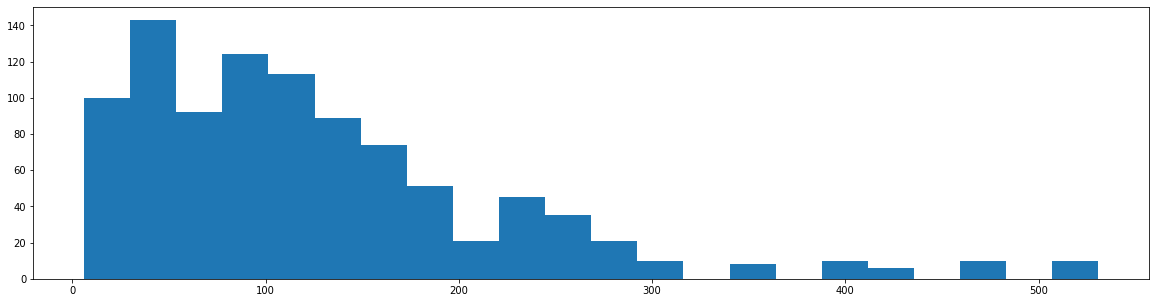

In [159]:
fetch_and_plot_degree_hist_of_given_type(bow_graph, 'doc')

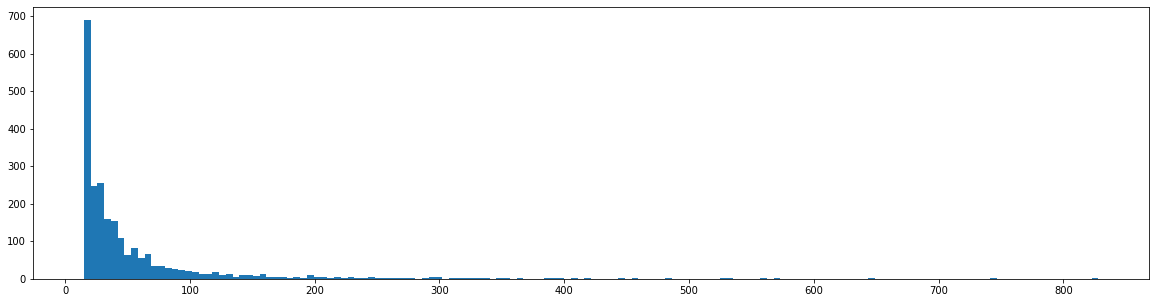

In [160]:
fetch_and_plot_degree_hist_of_given_type(bow_graph, 'word')

In [161]:
words_degree = [d for n,d in bow_graph.degree() if bow_graph.nodes[n]['type'] == 'word']

In [162]:
min(words_degree)

15

In [163]:
max(words_degree)

828

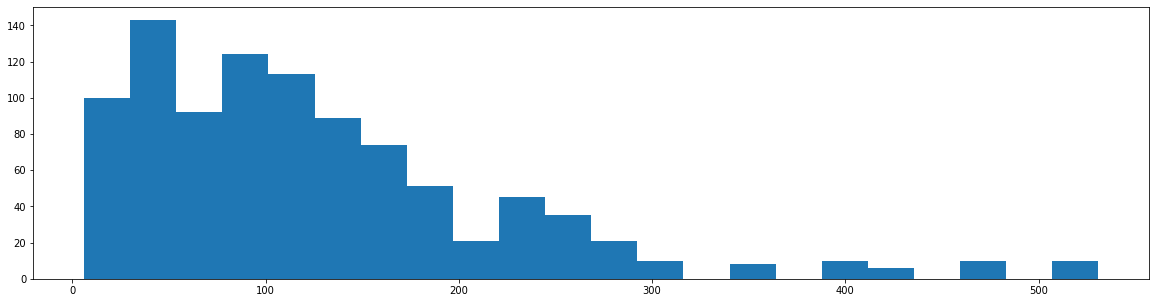

In [164]:
import numpy as np
import matplotlib.pyplot as plt
docs_degree = [d for n,d in bow_graph.degree() if bow_graph.nodes[n]['type'] == 'doc']
plt.hist(docs_degree, bins='auto');

In [ ]:
# edges weight distribution
list(bow_graph.edges(data=True))

In [ ]:
for n in bow_graph.edges(data=True):
  print(n)

In [185]:
n.count

<function tuple.count>

In [192]:
type(n)

tuple

In [ ]:
edges_weight = [n[2]['weight'] for n in bow_graph.edges(data=True)]
edges_weight

# Filtering Non-Distinguishing Words Using Graph Charecteristics

My aim here is to see if communities form around resume categories. If it's true it means that there are words that are 'seperating' and words that are 'uniting' that is - words that connect communities by appearing in cross-categorical resumes. I want to detect the uniting words and remove them in order to be able to detect the communities I think there are.

In [256]:
# Words with high and low degree
words_degree = {}
for n,d in bow_graph.degree():
  if bow_graph.nodes[n]['type'] == 'word':
    words_degree[n] = d

In [265]:
words_degree_df = pd.DataFrame(words_degree, index=[0]).transpose().reset_index()
words_degree_df.columns = ['word','degree']
words_degree_df.head()

,word,degree
0,accounting,38
1,action,40
2,advanced,49
3,analysis,243
4,analytics,76


In [271]:
words_degree_df[words_degree_df['degree']>300].sort_values(by = 'degree')

,word,degree
383,new,301
189,worked,301
126,process,302
174,technologies,308
145,reports,308
367,like,315
209,india,318
170,systems,320
14,based,322
410,responsibilities,328


In [274]:
words_degree_df[words_degree_df['degree']<20].sort_values(by = 'degree')

,word,degree
1998,sungard,15
1969,emea,15
1972,escalations,15
1507,essential,15
2017,noc,15
...,...,...
368,linear,19
731,suggestions,19
340,funds,19
1901,qtp,19


# Are There Communities Here?

In [171]:
nx.number_connected_components(bow_graph)

1

In [ ]:
nx.clustering(bow_graph)

In [243]:
from networkx.algorithms.community import greedy_modularity_communities

greedy_modularity_results = list(greedy_modularity_communities(bow_graph_indexes))
sorted(greedy_modularity_results[0])

[1,
 2,
 4,
 5,
 6,
 8,
 11,
 12,
 14,
 15,
 16,
 18,
 21,
 22,
 24,
 25,
 26,
 28,
 31,
 32,
 34,
 35,
 36,
 38,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 111,
 113,
 114,
 115,
 116,
 117,
 119,
 120,
 121,
 122,
 123,
 125,
 126,
 127,
 128,
 129,
 131,
 132,
 133,
 134,
 135,
 137,
 138,
 139,
 143,
 148,
 153,
 158,
 163,
 168,
 173,
 178,
 183,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239

In [245]:
len(greedy_modularity_results)

5

# Ideas For Later
- Drop words with degree that's too high - could just remove the node. if the word appears in over 70% of the documents than its probably not a distinguishing one.
- See what happened in the first community detecion results, try to infer how the communities divided.
- Learn the difference between community detection and clustering, summarize and try algorithms for both (this is a blog post material).
- Find community detection/ clustering algorithms that take into account an edge's weight as well as connectivity.
- See if other measurments can be used to clear out general words. for example - centrality, betweenness, check other functions and graph charecteristics to think about more

# Trying This Out

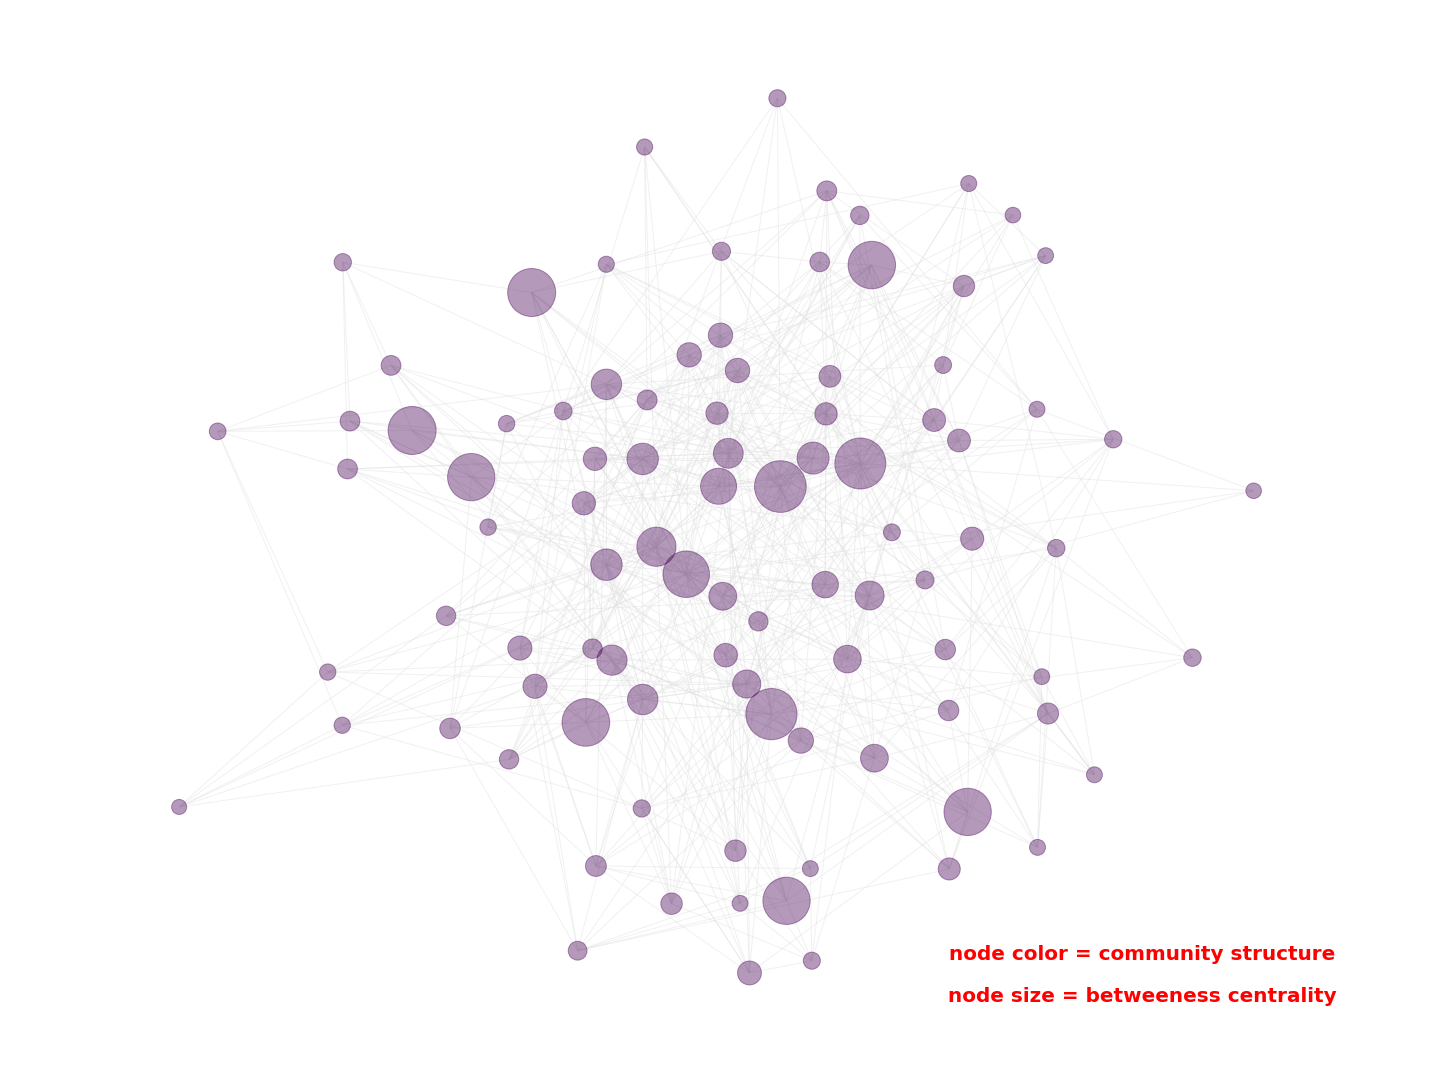

In [168]:
import matplotlib.pyplot as plt
from random import sample
import networkx as nx

# Gold standard data of positive gene functional associations
# from https://www.inetbio.org/wormnet/downloadnetwork.php
G = bow_graph

# remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G) / 1.5)
nodes = sample(list(G.nodes), num_to_remove)
G.remove_nodes_from(nodes)

# remove low-degree nodes
low_degree = [n for n, d in G.degree() if d < 10]
G.remove_nodes_from(low_degree)

# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

# Ideas for Networkx Contribution


## Degree histogram per given node type

In [ ]:
# current function:
def degree_histogram(G):
    """Returns a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    counts = Counter(d for n, d in G.degree())
    return [counts.get(i, 0) for i in range(max(counts) + 1)]

In [207]:
# My advancement
from collections import Counter
def degree_histogram_with_filter(G, attr_to_filter = None, attr_value_to_filter= None):
    """Returns a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    attr_to_filter : str containing an attribute of the node to filter by
    attr_value_to_filter: str containing the value to filter by

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    if (attr_to_filter == None) & (attr_value_to_filter == None): 
      counts = Counter(d for n, d in G.degree())
    else:
      counts = Counter(d for n, d in G.degree() if G.nodes[n][attr_to_filter] == attr_value_to_filter)
    return [counts.get(i, 0) for i in range(max(counts) + 1)]

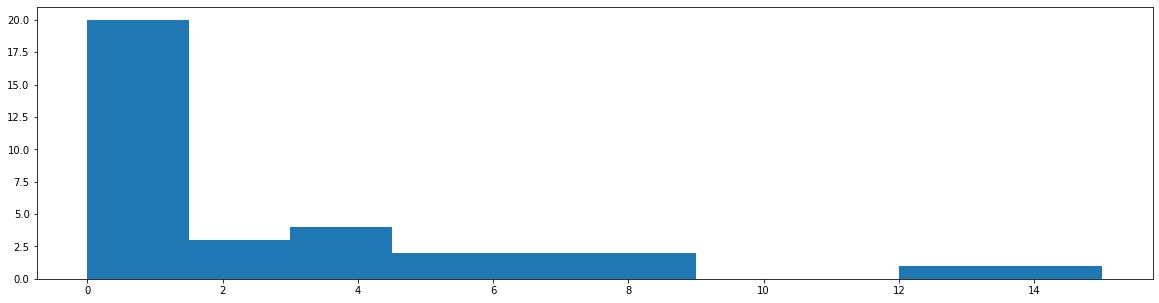

In [212]:
all_nodes_degree_hist = degree_histogram_with_filter(bow_graph)
plt.hist(all_nodes_degree_hist);

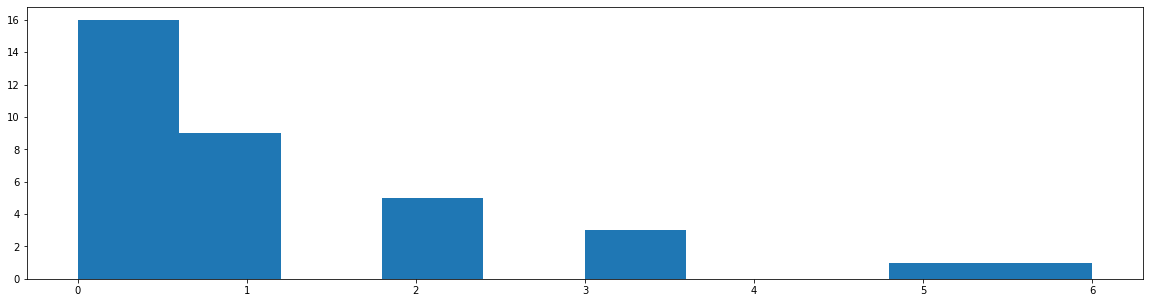

In [215]:
words_degree_hist = degree_histogram_with_filter(bow_graph,'type','word')
plt.hist(words_degree_hist);